<a href="https://colab.research.google.com/github/perezlenin1984/Pruebas_Icfes_2023/blob/main/Version_01/Prueba_Saber_V1_0_Arbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TALENTOTECH Y MINTIC**

**BOOTCAMP: ANÁLISIS Y VISUALIZACIÓN DE DATOS**

**PROYECTO: PRUEBAS SABER 11-2023 BOGOTÁ**

**NOTEBOOK VERSIÓN 1.0:** Árbol de decisión eliminando todos los valores nulos

**Profesor:** Ingeniero José Albeiro Montes Gil

**Equipo de trabajo:**

Lenin Hernando Pérez

Diana Carolina Valencia

Edwin Tumay Mojica

**Introducción**

En este notebook se presentan un análisis exploratorio de las pruebas Saber del grado 11 del año 2023 para saber cómo están distribuidos los datos y la aplicación del modelo de machine learning árbol de decisiones, para ver cómo clasifica los puntajes de los estudiantes de acuerdo con su situación socioeconómica.

Para esta y todas las versiones 1.X, se van a eliminar todos los valores nulos para examinar cómo se comportan los modelos en ese contexto y compararlos con otras condiciones (eliminando columnas que no se requieren y luego eliminar los valores nulos, rellenando todos los valores nulos, eliminar columnas que no se requieren y luego rellenar los valores nulos).

**Importar las bibliotecas**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

**Cargar los datos**

In [ ]:
df1 = pd.read_excel('/content/Icfes2023-A.xlsx')
df2 = pd.read_excel('/content/Icfes2023-B.xlsx')

In [ ]:
#Obtener las columnas que tienen en común df1 y df2
col_comun = list(set(df1.columns)&set(df2.columns))
#Preparar los nuevos df de acuerdo con las columnas que tienen en común
df1_comun = df1[col_comun]
df2_comun = df2[col_comun]
#Concatenar df1_comun con df2_comun
merged_df = pd.concat([df1_comun, df2_comun], ignore_index=True)
#Información básica de las columnas de merged_df
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80847 entries, 0 to 80846
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   PERCENTIL_MATEMATICAS          80847 non-null  int64         
 1   PERCENTIL_SOCIALES_CIUDADANAS  80847 non-null  int64         
 2   ESTU_GENERO                    80847 non-null  object        
 3   FAMI_TRABAJOLABORMADRE         77620 non-null  object        
 4   FAMI_COMELECHEDERIVADOS        75155 non-null  object        
 5   ESTU_COD_DEPTO_PRESENTACION    80847 non-null  int64         
 6   ESTU_COD_RESIDE_DEPTO          80847 non-null  int64         
 7   FAMI_ESTRATOVIVIENDA           75834 non-null  object        
 8   ESTU_TIPOREMUNERACION          77520 non-null  object        
 9   ESTU_CONSECUTIVO               80847 non-null  object        
 10  ESTU_ESTADOINVESTIGACION       80847 non-null  object        
 11  ESTU_PRESENTACI

**Preparación de los datos**

Se examina la columna ESTU_PRIVADO_LIBERTAD con un gráfico de torta para revisar cómo están distribuidos los valores

<Axes: title={'center': 'Estudiantes privados de la libertad'}, ylabel='count'>

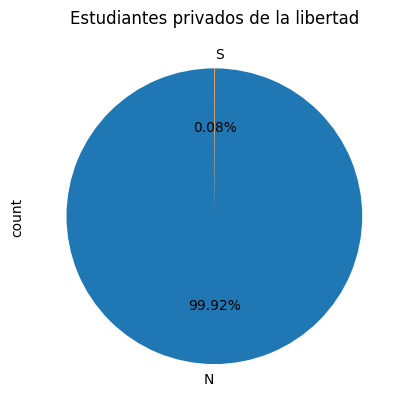

In [ ]:
libertad = merged_df['ESTU_PRIVADO_LIBERTAD'].value_counts()
libertad.plot.pie(
    y = 'count',
    title = 'Estudiantes privados de la libertad',
    startangle = 90,
    autopct = '%1.2f%%'
)

Hay un 99,92% de los estudiantes que NO están privados de la libertad. Esto permite desechar esta columna para la implementación de los modelos de machine learning.

Para la implementación de los modelos de machine learning, únicamente se tendrán en cuenta los aspectos socioeconómicos y el puntaje global de cada estudiante (se desechan los puntajes individuales de cada asignatura).

In [ ]:
seleccionColumnas = ["ESTU_PRESENTACIONSABADO","FAMI_EDUCACIONMADRE",
                    "FAMI_TIENESERVICIOTV","COLE_CARACTER","ESTU_GENERO","FAMI_TIENEHORNOMICROOGAS",
                    "FAMI_PERSONASHOGAR","ESTU_TIPOREMUNERACION","FAMI_TIENECONSOLAVIDEOJUEGOS",
                    "ESTU_HORASSEMANATRABAJA","FAMI_EDUCACIONPADRE","FAMI_TIENEAUTOMOVIL",
                    "COLE_JORNADA","COLE_NATURALEZA","FAMI_TRABAJOLABORMADRE","ESTU_NSE_INDIVIDUAL",
                    "FAMI_COMECEREALFRUTOSLEGUMBRE","FAMI_TIENECOMPUTADOR",
                    "FAMI_CUARTOSHOGAR","FAMI_TIENEMOTOCICLETA","FAMI_COMELECHEDERIVADOS",
                    "FAMI_TIENEINTERNET","ESTU_DEDICACIONLECTURADIARIA","COLE_AREA_UBICACION",
                    "FAMI_SITUACIONECONOMICA","FAMI_ESTRATOVIVIENDA","FAMI_TRABAJOLABORPADRE","ESTU_FECHANACIMIENTO",
                     "COLE_GENERO","FAMI_COMECARNEPESCADOHUEVO","PUNT_GLOBAL", "FAMI_TIENELAVADORA","COLE_CALENDARIO",
                     "ESTU_DEDICACIONINTERNET","ESTU_NSE_ESTABLECIMIENTO","FAMI_NUMLIBROS",'COLE_BILINGUE']
df_icfes = merged_df[seleccionColumnas]
print(df_icfes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80847 entries, 0 to 80846
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ESTU_PRESENTACIONSABADO        80699 non-null  object        
 1   FAMI_EDUCACIONMADRE            76133 non-null  object        
 2   FAMI_TIENESERVICIOTV           75913 non-null  object        
 3   COLE_CARACTER                  77102 non-null  object        
 4   ESTU_GENERO                    80847 non-null  object        
 5   FAMI_TIENEHORNOMICROOGAS       77632 non-null  object        
 6   FAMI_PERSONASHOGAR             77721 non-null  object        
 7   ESTU_TIPOREMUNERACION          77520 non-null  object        
 8   FAMI_TIENECONSOLAVIDEOJUEGOS   77584 non-null  object        
 9   ESTU_HORASSEMANATRABAJA        77633 non-null  object        
 10  FAMI_EDUCACIONPADRE            76179 non-null  object        
 11  FAMI_TIENEAUTOM

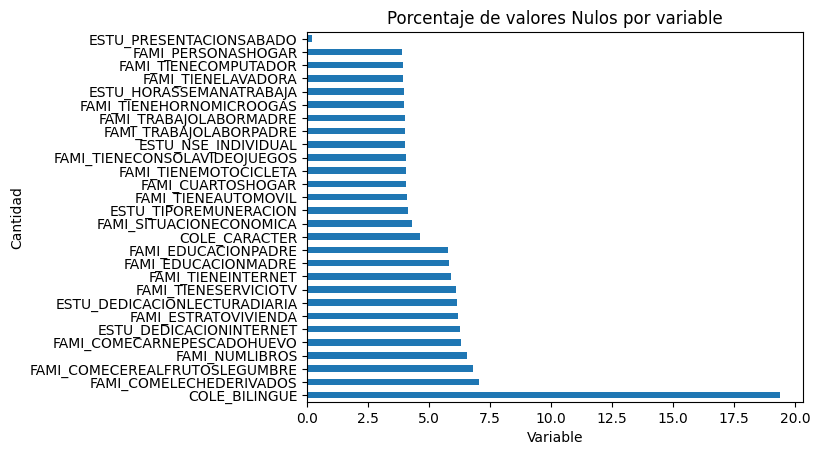

In [ ]:
nulos_porcentaje = df_icfes.isnull().sum().sort_values(ascending=False)/ len(df_icfes)*100
nulos = nulos_porcentaje[nulos_porcentaje > 0]
nulos.plot(kind='barh')
plt.title('Porcentaje de valores Nulos por variable')
plt.xlabel('Variable')
plt.ylabel('Cantidad')
plt.show()

Como se mencionó anteriormente, para las versiones 1.X se van a eliminar todos los valores nulos. Posteriormente se compararán los resultados con los demás casos correspondientes.

In [ ]:
data_icfes = df_icfes.dropna()
data_icfes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56666 entries, 4 to 80837
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ESTU_PRESENTACIONSABADO        56666 non-null  object        
 1   FAMI_EDUCACIONMADRE            56666 non-null  object        
 2   FAMI_TIENESERVICIOTV           56666 non-null  object        
 3   COLE_CARACTER                  56666 non-null  object        
 4   ESTU_GENERO                    56666 non-null  object        
 5   FAMI_TIENEHORNOMICROOGAS       56666 non-null  object        
 6   FAMI_PERSONASHOGAR             56666 non-null  object        
 7   ESTU_TIPOREMUNERACION          56666 non-null  object        
 8   FAMI_TIENECONSOLAVIDEOJUEGOS   56666 non-null  object        
 9   ESTU_HORASSEMANATRABAJA        56666 non-null  object        
 10  FAMI_EDUCACIONPADRE            56666 non-null  object        
 11  FAMI_TIENEAUTOMOVIL 

In [ ]:
data_icfes = data_icfes.drop_duplicates()
data_icfes

,ESTU_PRESENTACIONSABADO,FAMI_EDUCACIONMADRE,FAMI_TIENESERVICIOTV,COLE_CARACTER,ESTU_GENERO,FAMI_TIENEHORNOMICROOGAS,FAMI_PERSONASHOGAR,ESTU_TIPOREMUNERACION,FAMI_TIENECONSOLAVIDEOJUEGOS,ESTU_HORASSEMANATRABAJA,...,ESTU_FECHANACIMIENTO,COLE_GENERO,FAMI_COMECARNEPESCADOHUEVO,PUNT_GLOBAL,FAMI_TIENELAVADORA,COLE_CALENDARIO,ESTU_DEDICACIONINTERNET,ESTU_NSE_ESTABLECIMIENTO,FAMI_NUMLIBROS,COLE_BILINGUE
4,No,Postgrado,Si,ACADÉMICO,M,Si,3 a 4,Si; en efectivo,Si,0,...,2006-01-21,MIXTO,Todos o casi todos los días,328,Si,A,Más de 3 horas,3,26 A 100 LIBROS,N
5,No,Secundaria (Bachillerato) completa,Si,ACADÉMICO,M,Si,3 a 4,No,No,0,...,2005-10-16,MIXTO,Todos o casi todos los días,304,Si,A,Entre 1 y 3 horas,3,11 A 25 LIBROS,N
8,No,Postgrado,Si,ACADÉMICO,F,No,3 a 4,No,No,0,...,2006-08-15,MIXTO,3 a 5 veces por semana,420,Si,A,Más de 3 horas,3,26 A 100 LIBROS,N
9,No,Postgrado,Si,ACADÉMICO,M,Si,5 a 6,No,Si,Entre 11 y 20 horas,...,2007-01-18,MIXTO,Todos o casi todos los días,281,Si,A,Más de 3 horas,3,0 A 10 LIBROS,N
10,No,Educación profesional completa,No,ACADÉMICO,M,No,3 a 4,No,No,Menos de 10 horas,...,2006-08-01,MIXTO,3 a 5 veces por semana,311,Si,A,Entre 30 y 60 minutos,3,0 A 10 LIBROS,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80833,No,Educación profesional incompleta,Si,ACADÉMICO,F,Si,1 a 2,Si; en efectivo,No,Menos de 10 horas,...,2005-04-08,FEMENINO,3 a 5 veces por semana,285,Si,B,Entre 30 y 60 minutos,4,11 A 25 LIBROS,N
80834,No,Educación profesional completa,Si,ACADÉMICO,F,Si,3 a 4,No,No,Entre 11 y 20 horas,...,2004-08-25,FEMENINO,Todos o casi todos los días,312,Si,B,Entre 30 y 60 minutos,4,26 A 100 LIBROS,N
80835,No,Educación profesional completa,Si,ACADÉMICO,F,Si,3 a 4,No,Si,0,...,2005-06-22,FEMENINO,Todos o casi todos los días,366,Si,B,Entre 1 y 3 horas,4,MÁS DE 100 LIBROS,N
80836,No,Postgrado,Si,ACADÉMICO,F,Si,3 a 4,No,No,0,...,2004-11-04,FEMENINO,Todos o casi todos los días,407,Si,B,Entre 1 y 3 horas,4,MÁS DE 100 LIBROS,N


**Transformación de los datos**

En este apartado se realizan unos gráficos de cada característica para ver cómo están distribuidos sus valores:

- Para características que tienen solo dos valores, se emplea un gráfico de torta.

- Para características que tienen 3 ó más valores, se emplea un gráfico de barras.

Luego se procede a codificar cada valor en un número que pueda leer el algoritmo.

<Axes: title={'center': 'Consumo de leche y derivados'}, ylabel='FAMI_COMELECHEDERIVADOS'>

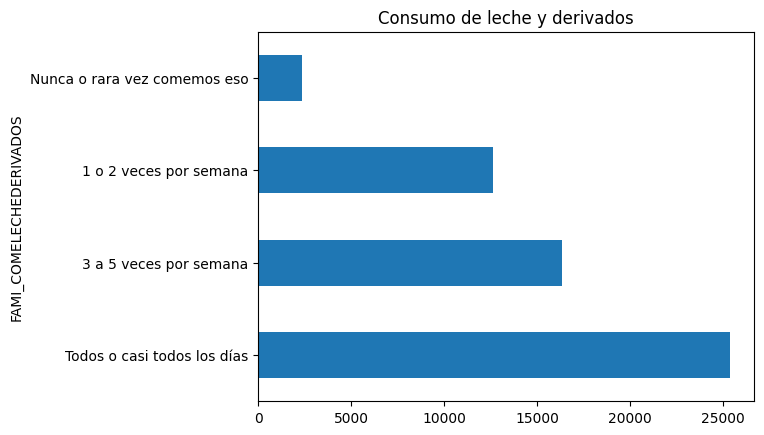

In [ ]:
lacteos = data_icfes['FAMI_COMELECHEDERIVADOS'].value_counts()
lacteos.plot.barh(
    y = 'count',
    title = 'Consumo de leche y derivados'
)

In [ ]:
frecuencia = {'Nunca o rara vez comemos eso':0, '1 o 2 veces por semana': 1, '3 a 5 veces por semana': 2, 'Todos o casi todos los días': 3}
data_icfes['FAMI_COMELECHEDERIVADOS'] = data_icfes['FAMI_COMELECHEDERIVADOS'].map(frecuencia)

<Axes: title={'center': 'Frecuencia de consumo de carne, pescado y huevos'}, ylabel='FAMI_COMECARNEPESCADOHUEVO'>

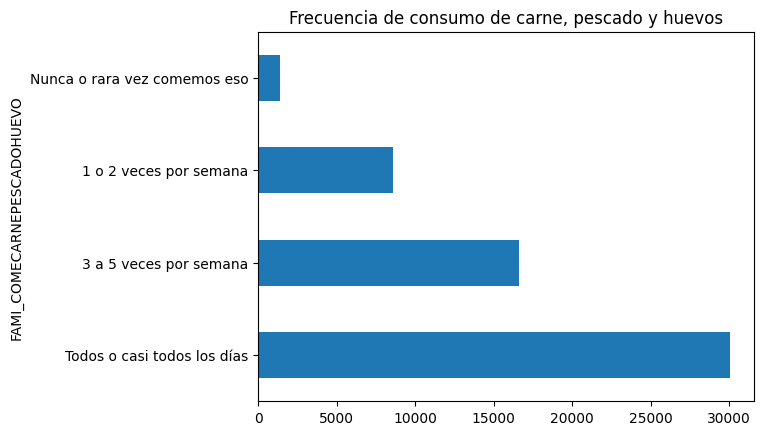

In [ ]:
proteinas = data_icfes['FAMI_COMECARNEPESCADOHUEVO'].value_counts()
proteinas.plot.barh(
    y = 'count',
    title = 'Frecuencia de consumo de carne, pescado y huevos'
)

In [ ]:
data_icfes['FAMI_COMECARNEPESCADOHUEVO'] = data_icfes['FAMI_COMECARNEPESCADOHUEVO'].map(frecuencia)

<Axes: title={'center': 'Frecuencia de consumo de cereales, frutos y legumbres'}, ylabel='FAMI_COMECEREALFRUTOSLEGUMBRE'>

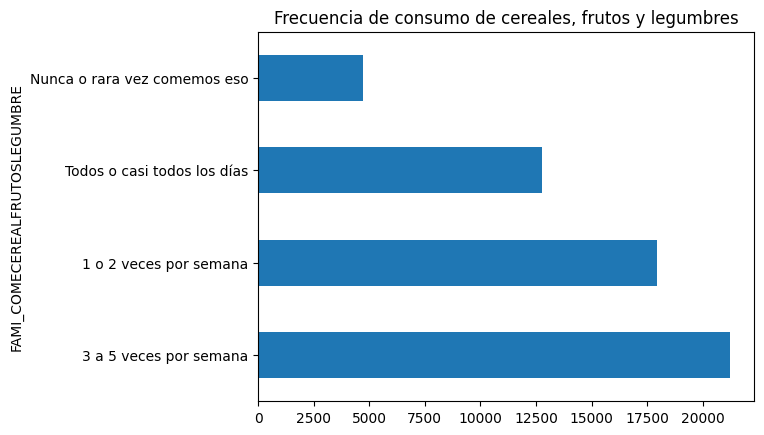

In [ ]:
cereales = data_icfes['FAMI_COMECEREALFRUTOSLEGUMBRE'].value_counts()
cereales.plot.barh(
    y = 'count',
    title = 'Frecuencia de consumo de cereales, frutos y legumbres'
)

In [ ]:
data_icfes['FAMI_COMECEREALFRUTOSLEGUMBRE'] = data_icfes['FAMI_COMECEREALFRUTOSLEGUMBRE'].map(frecuencia)

<Axes: title={'center': 'Grado educación madre'}, ylabel='FAMI_EDUCACIONMADRE'>

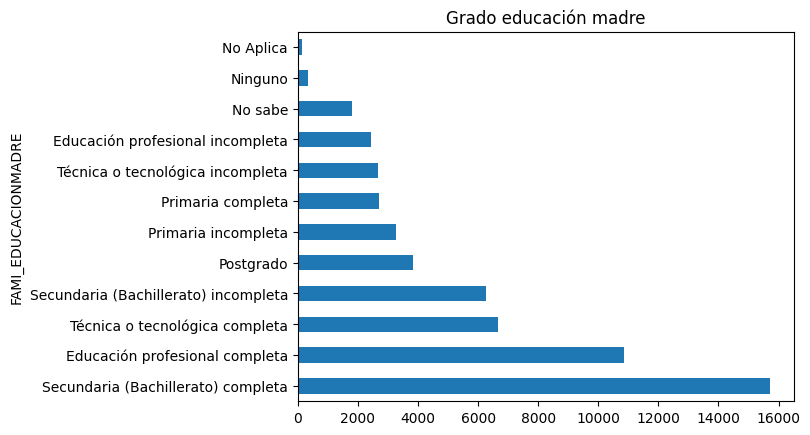

In [ ]:
madre_edu = data_icfes['FAMI_EDUCACIONMADRE'].value_counts()
madre_edu.plot.barh(
    y = 'count',
    title = 'Grado educación madre'
)

<Axes: title={'center': 'Grado educación padre'}, ylabel='FAMI_EDUCACIONPADRE'>

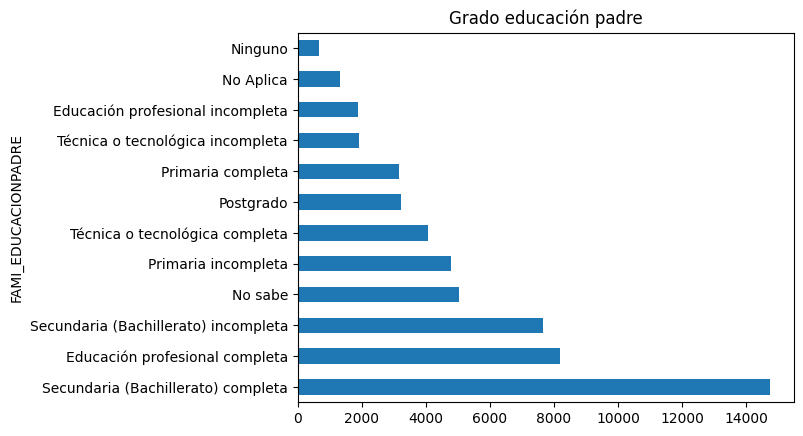

In [ ]:
padre_edu = data_icfes['FAMI_EDUCACIONPADRE'].value_counts()
padre_edu.plot.barh(
    y = 'count',
    title = 'Grado educación padre'
)

In [ ]:
educacion = {'No sabe':0,'No Aplica':1,'Ninguno':2, 'Primaria incompleta':3, 'Primaria completa':4,'Secundaria (Bachillerato) incompleta':5,
                      'Secundaria (Bachillerato) completa':6,'Técnica o tecnológica incompleta':7,'Técnica o tecnológica completa':8,
                     'Educación profesional incompleta':9,'Educación profesional completa':10,'Postgrado':11}
data_icfes['FAMI_EDUCACIONMADRE'] = data_icfes['FAMI_EDUCACIONMADRE'].map(educacion)
data_icfes['FAMI_EDUCACIONPADRE'] = data_icfes['FAMI_EDUCACIONPADRE'].map(educacion)

<Axes: title={'center': 'Labores madre'}, ylabel='FAMI_TRABAJOLABORMADRE'>

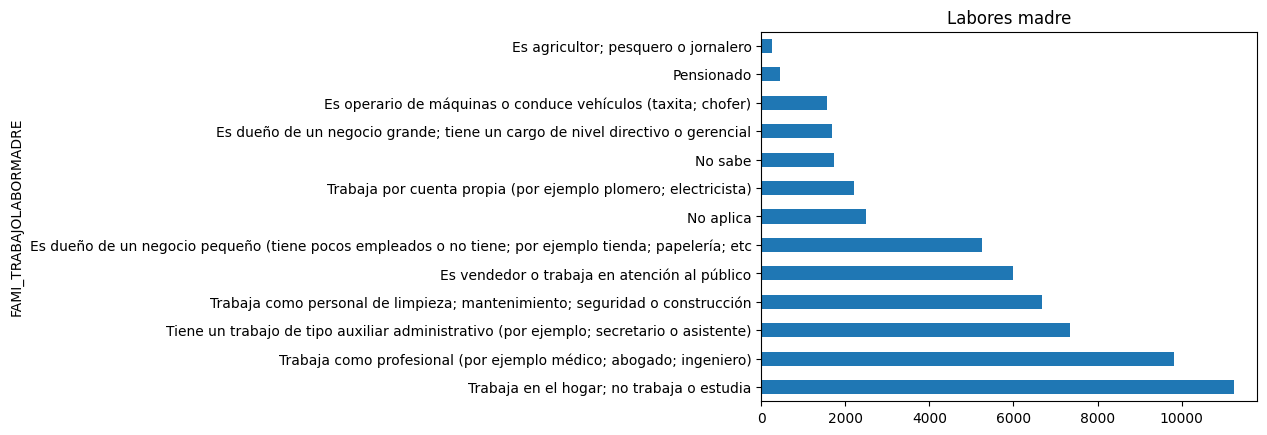

In [ ]:
labor_madre = data_icfes['FAMI_TRABAJOLABORMADRE'].value_counts()
labor_madre.plot.barh(
    y = 'count',
    title = 'Labores madre'
)

<Axes: title={'center': 'Labores padre'}, ylabel='FAMI_TRABAJOLABORPADRE'>

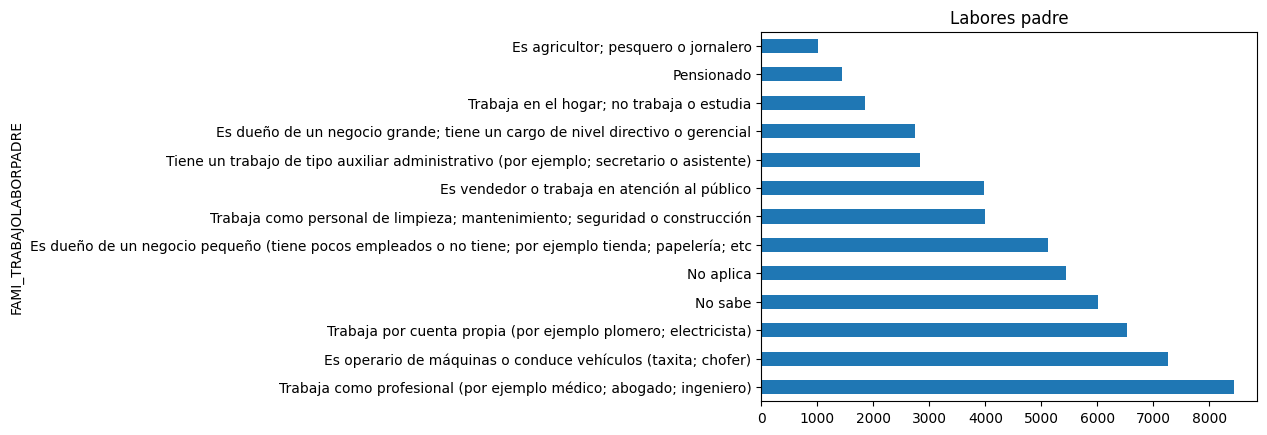

In [ ]:
labor_padre = data_icfes['FAMI_TRABAJOLABORPADRE'].value_counts()
labor_padre.plot.barh(
    y = 'count',
    title = 'Labores padre'
)

In [ ]:
labor = {'Trabaja como profesional (por ejemplo médico; abogado; ingeniero)': 0,
         'Es operario de máquinas o conduce vehículos (taxita; chofer)': 1,
         'Trabaja por cuenta propia (por ejemplo plomero; electricista)': 2,
         'No sabe': 3,
         'No aplica': 4,
         'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene; por ejemplo tienda; papelería; etc': 5,
         'Trabaja como personal de limpieza; mantenimiento; seguridad o construcción': 6,
         'Es vendedor o trabaja en atención al público': 7,
         'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo; secretario o asistente)': 8,
         'Es dueño de un negocio grande; tiene un cargo de nivel directivo o gerencial': 9,
         'Trabaja en el hogar; no trabaja o estudia': 10,
         'Pensionado': 11,
         'Es agricultor; pesquero o jornalero': 12}
data_icfes['FAMI_TRABAJOLABORPADRE'] = data_icfes['FAMI_TRABAJOLABORPADRE'].map(labor)
data_icfes['FAMI_TRABAJOLABORMADRE'] = data_icfes['FAMI_TRABAJOLABORMADRE'].map(labor)

<Axes: title={'center': 'Asiste a clase los sábados'}, ylabel='count'>

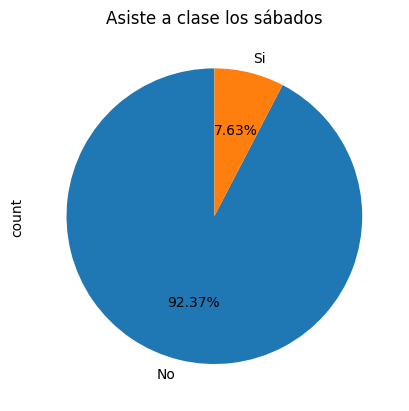

In [ ]:
sabado = data_icfes['ESTU_PRESENTACIONSABADO'].value_counts()
sabado.plot.pie(
    y = 'count',
    title = 'Asiste a clase los sábados',
    startangle = 90,
    autopct = '%1.2f%%'
)

<Axes: title={'center': 'Tiene servicio de televisión'}, ylabel='count'>

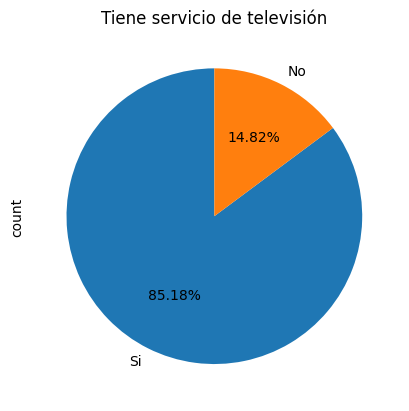

In [ ]:
television = data_icfes['FAMI_TIENESERVICIOTV'].value_counts()
television.plot.pie(
    y = 'count',
    title = 'Tiene servicio de televisión',
    startangle = 90,
    autopct = '%1.2f%%'
)

<Axes: title={'center': 'Tiene horno microondas o gas'}, ylabel='count'>

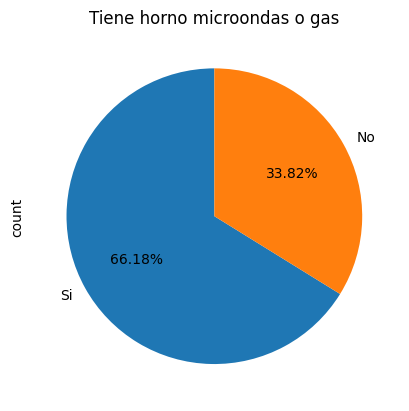

In [ ]:
horno = data_icfes['FAMI_TIENEHORNOMICROOGAS'].value_counts()
horno.plot.pie(
    y = 'count',
    title = 'Tiene horno microondas o gas',
    startangle = 90,
    autopct = '%1.2f%%'
)

<Axes: title={'center': 'Tiene videojuegos'}, ylabel='count'>

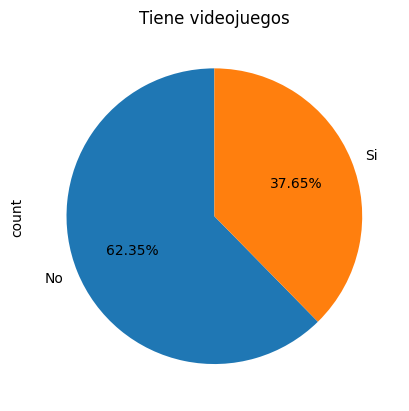

In [ ]:
videojuego = data_icfes['FAMI_TIENECONSOLAVIDEOJUEGOS'].value_counts()
videojuego.plot.pie(
    y = 'count',
    title = 'Tiene videojuegos',
    startangle = 90,
    autopct = '%1.2f%%'
)

<Axes: title={'center': 'Tiene automovil'}, ylabel='count'>

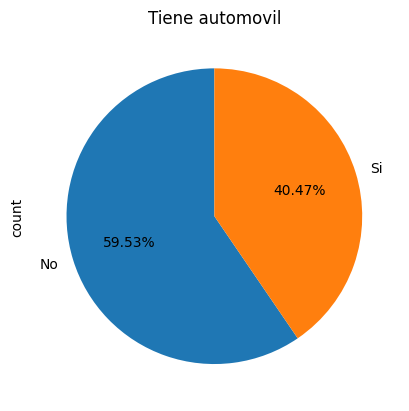

In [ ]:
automovil = data_icfes['FAMI_TIENEAUTOMOVIL'].value_counts()
automovil.plot.pie(
    y = 'count',
    title = 'Tiene automovil',
    startangle = 90,
    autopct = '%1.2f%%'
)

<Axes: title={'center': 'Tiene computador'}, ylabel='count'>

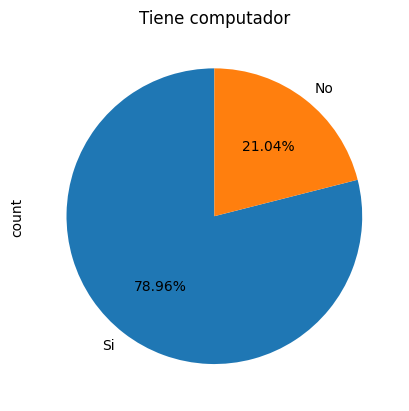

In [ ]:
computador = data_icfes['FAMI_TIENECOMPUTADOR'].value_counts()
computador.plot.pie(
    y = 'count',
    title = 'Tiene computador',
    startangle = 90,
    autopct = '%1.2f%%'
)

<Axes: title={'center': 'Tiene motocicleta'}, ylabel='count'>

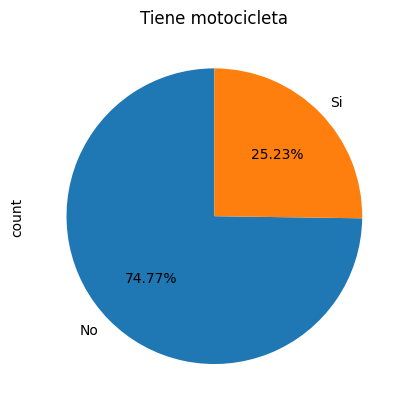

In [ ]:
motocicleta = data_icfes['FAMI_TIENEMOTOCICLETA'].value_counts()
motocicleta.plot.pie(
    y = 'count',
    title = 'Tiene motocicleta',
    startangle = 90,
    autopct = '%1.2f%%'
)

<Axes: title={'center': 'Tiene internet'}, ylabel='count'>

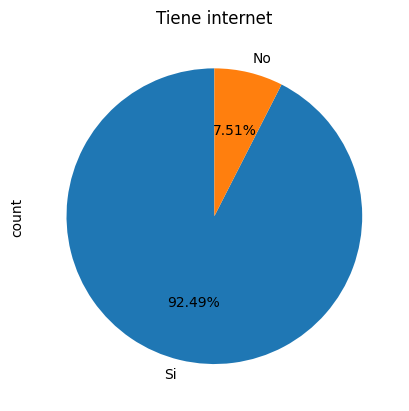

In [ ]:
internet = data_icfes['FAMI_TIENEINTERNET'].value_counts()
internet.plot.pie(
    y = 'count',
    title = 'Tiene internet',
    startangle = 90,
    autopct = '%1.2f%%'
)

<Axes: title={'center': 'Tiene lavadora'}, ylabel='count'>

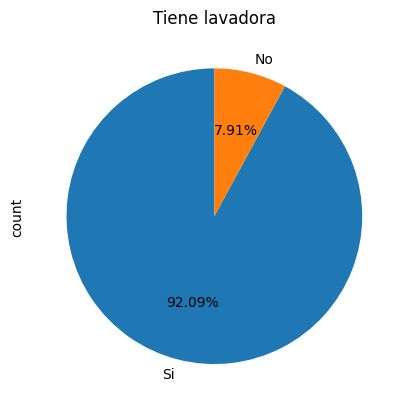

In [ ]:
lavadora = data_icfes['FAMI_TIENELAVADORA'].value_counts()
lavadora.plot.pie(
    y = 'count',
    title = 'Tiene lavadora',
    startangle = 90,
    autopct = '%1.2f%%'
)

In [ ]:
si_no = {'Si': 1, 'No': 0}
data_icfes['ESTU_PRESENTACIONSABADO'] = data_icfes['ESTU_PRESENTACIONSABADO'].map(si_no)
data_icfes['FAMI_TIENESERVICIOTV'] = data_icfes['FAMI_TIENESERVICIOTV'].map(si_no)
data_icfes['FAMI_TIENEHORNOMICROOGAS'] = data_icfes['FAMI_TIENEHORNOMICROOGAS'].map(si_no)
data_icfes['FAMI_TIENECONSOLAVIDEOJUEGOS'] = data_icfes['FAMI_TIENECONSOLAVIDEOJUEGOS'].map(si_no)
data_icfes['FAMI_TIENEAUTOMOVIL'] = data_icfes['FAMI_TIENEAUTOMOVIL'].map(si_no)
data_icfes['FAMI_TIENECOMPUTADOR'] = data_icfes['FAMI_TIENECOMPUTADOR'].map(si_no)
data_icfes['FAMI_TIENEMOTOCICLETA'] = data_icfes['FAMI_TIENEMOTOCICLETA'].map(si_no)
data_icfes['FAMI_TIENEINTERNET'] = data_icfes['FAMI_TIENEINTERNET'].map(si_no)
data_icfes['FAMI_TIENELAVADORA'] = data_icfes['FAMI_TIENELAVADORA'].map(si_no)

<Axes: title={'center': 'El colegio es bilingüe'}, ylabel='count'>

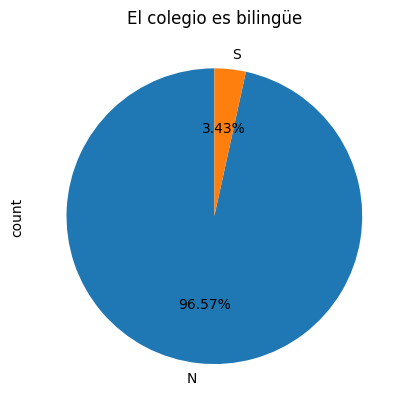

In [ ]:
bilingue = data_icfes['COLE_BILINGUE'].value_counts()
bilingue.plot.pie(
    y = 'count',
    title = 'El colegio es bilingüe',
    startangle = 90,
    autopct = '%1.2f%%'
)

In [ ]:
ese_ene = {'S': 1, 'N': 0}
data_icfes['COLE_BILINGUE'] = data_icfes['COLE_BILINGUE'].map(ese_ene)

<Axes: title={'center': 'Género'}, ylabel='count'>

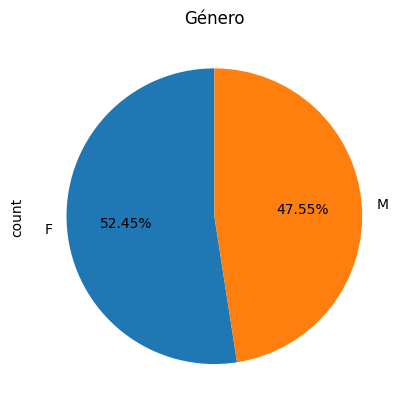

In [ ]:
sexo = data_icfes['ESTU_GENERO'].value_counts()
sexo.plot.pie(
    y = 'count',
    title = 'Género',
    startangle = 90,
    autopct = '%1.2f%%'
)

In [ ]:
genero = {'M': 1, 'F': 0}
data_icfes['ESTU_GENERO'] = data_icfes['ESTU_GENERO'].map(genero)

<Axes: title={'center': 'Naturaleza del colegio'}, ylabel='count'>

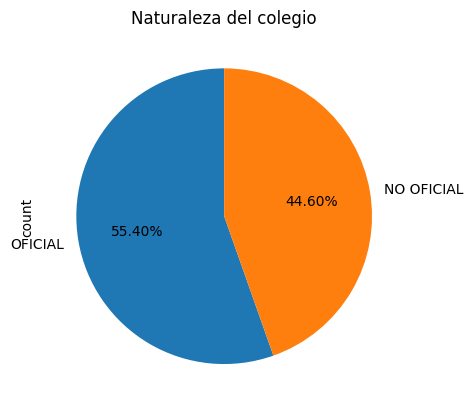

In [ ]:
caracter = data_icfes['COLE_NATURALEZA'].value_counts()
caracter.plot.pie(
    y = 'count',
    title = 'Naturaleza del colegio',
    startangle = 90,
    autopct = '%1.2f%%'
)

In [ ]:
naturaleza = {'OFICIAL':0, 'NO OFICIAL': 1}
data_icfes['COLE_NATURALEZA'] = data_icfes['COLE_NATURALEZA'].map(naturaleza)

<Axes: title={'center': 'Ubicación del colegio'}, ylabel='count'>

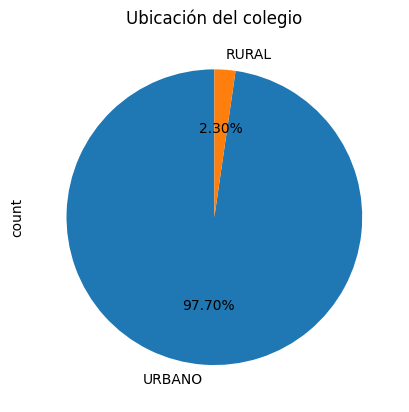

In [ ]:
ubicacion = data_icfes['COLE_AREA_UBICACION'].value_counts()
ubicacion.plot.pie(
    y = 'count',
    title = 'Ubicación del colegio',
    startangle = 90,
    autopct = '%1.2f%%'
)

In [ ]:
area = {'URBANO': 0, 'RURAL': 1}
data_icfes['COLE_AREA_UBICACION'] = data_icfes['COLE_AREA_UBICACION'].map(area)

<Axes: title={'center': 'Carácter del colegio'}, ylabel='COLE_CARACTER'>

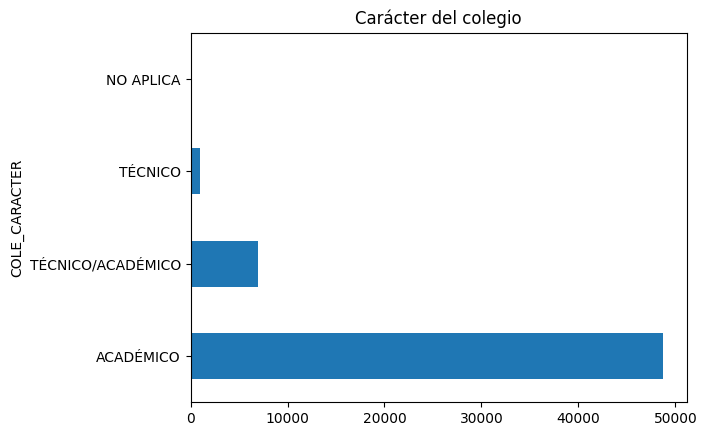

In [ ]:
tipo_col = data_icfes['COLE_CARACTER'].value_counts()
tipo_col.plot.barh(
    y = 'count',
    title = 'Carácter del colegio',
)

In [ ]:
caracter = {'NO APLICA':0, 'TÉCNICO': 1, 'ACADÉMICO': 2, 'TÉCNICO/ACADÉMICO': 3}
data_icfes['COLE_CARACTER'] = data_icfes['COLE_CARACTER'].map(caracter)

<Axes: title={'center': 'Cantidad de personas en el hogar'}, ylabel='FAMI_PERSONASHOGAR'>

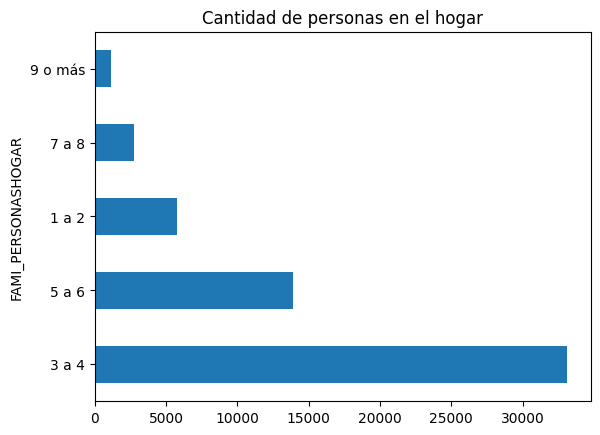

In [ ]:
familia = data_icfes['FAMI_PERSONASHOGAR'].value_counts()
familia.plot.barh(
    y = 'count',
    title = 'Cantidad de personas en el hogar',
)

In [ ]:
personas_hogar = {'1 a 2':1, '3 a 4': 2, '5 a 6': 3, '7 a 8': 4, '9 o más': 5}
data_icfes['FAMI_PERSONASHOGAR'] = data_icfes['FAMI_PERSONASHOGAR'].map(personas_hogar)

<Axes: title={'center': 'Tipo de remuneración'}, ylabel='ESTU_TIPOREMUNERACION'>

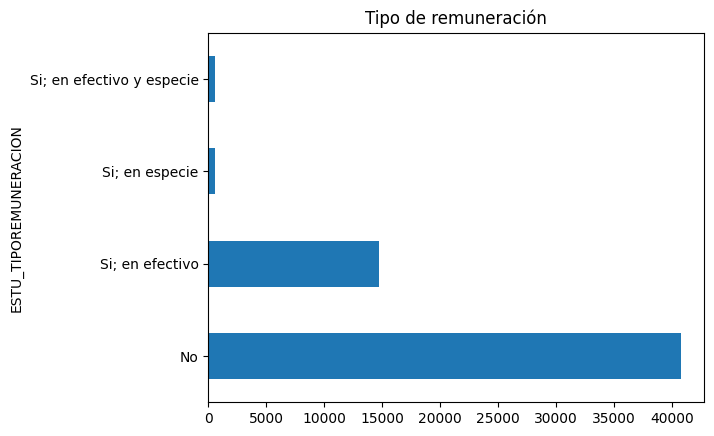

In [ ]:
pagos = data_icfes['ESTU_TIPOREMUNERACION'].value_counts()
pagos.plot.barh(
    y = 'count',
    title = 'Tipo de remuneración',
)

In [ ]:
remuneracion = {'No':0, 'Si; en especie': 1, 'Si; en efectivo': 2, 'Si; en efectivo y especie': 3}
data_icfes['ESTU_TIPOREMUNERACION'] = data_icfes['ESTU_TIPOREMUNERACION'].map(remuneracion)

<Axes: title={'center': 'Horas a la semana en que trabaja'}, ylabel='ESTU_HORASSEMANATRABAJA'>

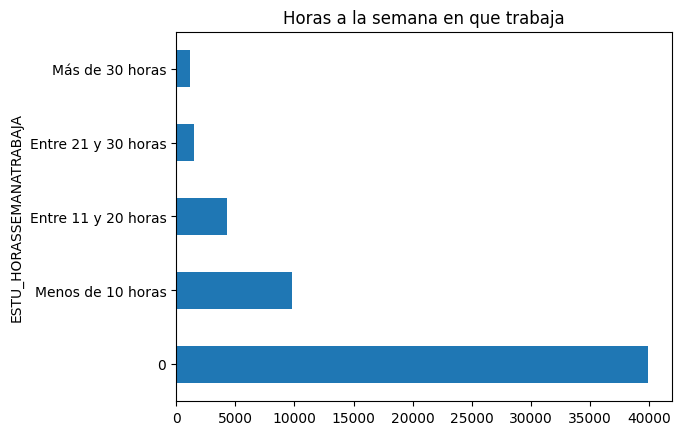

In [ ]:
semana = data_icfes['ESTU_HORASSEMANATRABAJA'].value_counts()
semana.plot.barh(
    y = 'count',
    title = 'Horas a la semana en que trabaja',
)

In [ ]:
horas_semana = {'0':0, 'Menos de 10 horas': 1, 'Entre 11 y 20 horas': 2, 'Entre 21 y 30 horas': 3, 'Más de 30 horas': 4}
data_icfes['ESTU_HORASSEMANATRABAJA'] = data_icfes['ESTU_HORASSEMANATRABAJA'].map(horas_semana)

<Axes: title={'center': 'Jornada del colegio'}, ylabel='COLE_JORNADA'>

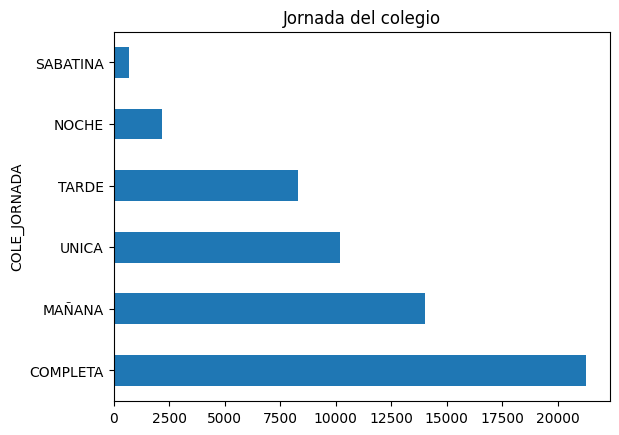

In [ ]:
tipo_jornada = data_icfes['COLE_JORNADA'].value_counts()
tipo_jornada.plot.barh(
    y = 'count',
    title = 'Jornada del colegio',
)

In [ ]:
jornada = {'SABATINA':0, 'NOCHE': 1, 'TARDE': 2, 'UNICA': 3, 'MAÑANA': 4, 'COMPLETA': 5}
data_icfes['COLE_JORNADA'] = data_icfes['COLE_JORNADA'].map(jornada)

<Axes: title={'center': 'Número de cuartos del hogar'}, ylabel='FAMI_CUARTOSHOGAR'>

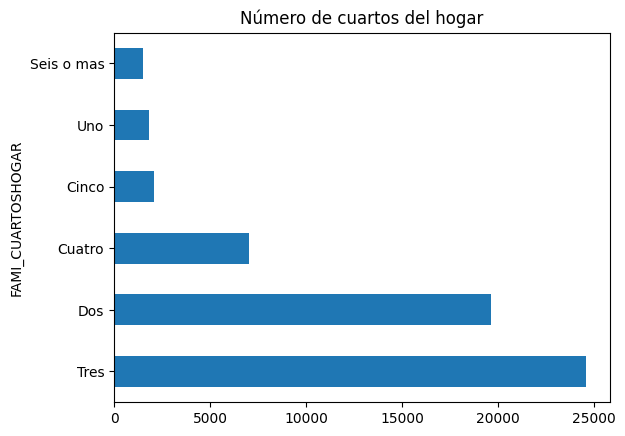

In [ ]:
numero_cuartos = data_icfes['FAMI_CUARTOSHOGAR'].value_counts()
numero_cuartos.plot.barh(
    y = 'count',
    title = 'Número de cuartos del hogar',
)

In [ ]:
cuartos = {'Uno': 1, 'Dos': 2, 'Tres': 3, 'Cuatro': 4, 'Cinco': 5, 'Seis o mas': 6}
data_icfes['FAMI_CUARTOSHOGAR'] = data_icfes['FAMI_CUARTOSHOGAR'].map(cuartos)

<Axes: title={'center': 'Tiempo diario dedicado a la lectura'}, ylabel='ESTU_DEDICACIONLECTURADIARIA'>

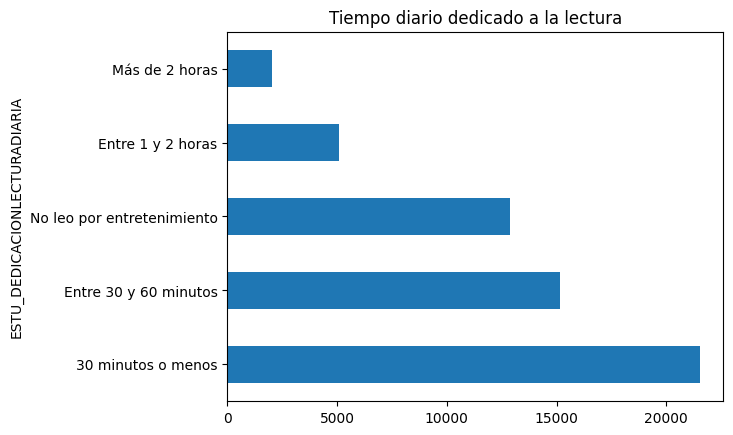

In [ ]:
horas_leer = data_icfes['ESTU_DEDICACIONLECTURADIARIA'].value_counts()
horas_leer.plot.barh(
    y = 'count',
    title = 'Tiempo diario dedicado a la lectura',
)

In [ ]:
lectura = {'30 minutos o menos': 0,
           'Entre 30 y 60 minutos': 1,
           'Entre 1 y 2 horas': 2,
           'Más de 2 horas': 3,
           'No leo por entretenimiento': 4}
data_icfes['ESTU_DEDICACIONLECTURADIARIA'] = data_icfes['ESTU_DEDICACIONLECTURADIARIA'].map(lectura)

<Axes: title={'center': 'Situación económica'}, ylabel='FAMI_SITUACIONECONOMICA'>

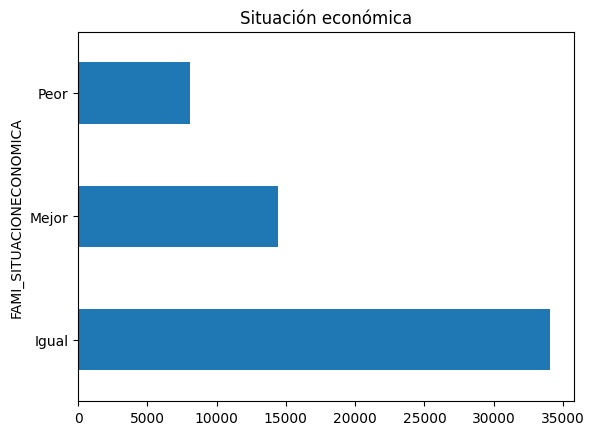

In [ ]:
situacion = data_icfes['FAMI_SITUACIONECONOMICA'].value_counts()
situacion.plot.barh(
    y = 'count',
    title = 'Situación económica',
)

In [ ]:
economia = {'Peor': 0, 'Igual': 1, 'Mejor': 2}
data_icfes['FAMI_SITUACIONECONOMICA'] = data_icfes['FAMI_SITUACIONECONOMICA'].map(economia)

<Axes: title={'center': 'Estrato de la vivienda'}, ylabel='FAMI_ESTRATOVIVIENDA'>

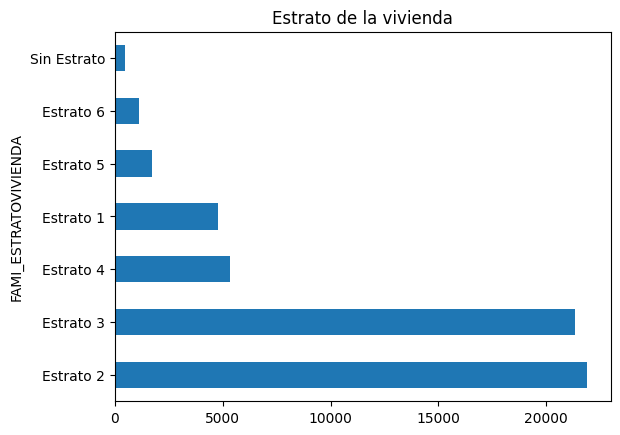

In [ ]:
est_vivienda = data_icfes['FAMI_ESTRATOVIVIENDA'].value_counts()
est_vivienda.plot.barh(
    y = 'count',
    title = 'Estrato de la vivienda',
)

In [ ]:
estrato = {'Sin Estrato': 0, 'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6}
data_icfes['FAMI_ESTRATOVIVIENDA'] = data_icfes['FAMI_ESTRATOVIVIENDA'].map(estrato)

<Axes: title={'center': 'Género del colegio'}, ylabel='COLE_GENERO'>

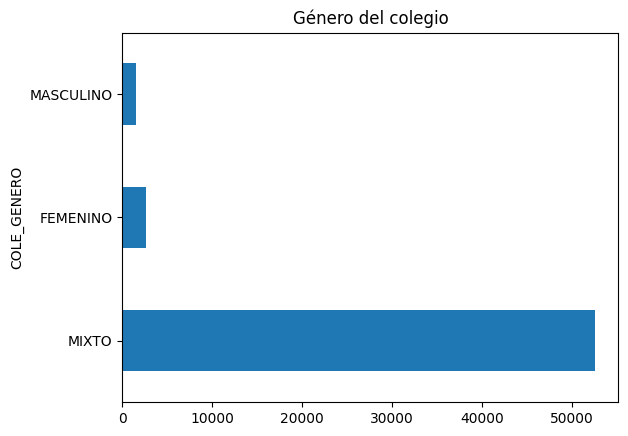

In [ ]:
genero_del_col = data_icfes['COLE_GENERO'].value_counts()
genero_del_col.plot.barh(
    y = 'count',
    title = 'Género del colegio',
)

In [ ]:
genero_col = {'MIXTO': 0, 'FEMENINO': 1, 'MASCULINO': 2}
data_icfes['COLE_GENERO'] = data_icfes['COLE_GENERO'].map(genero_col)

<Axes: title={'center': 'Tipo de calendario del colegio'}, ylabel='COLE_CALENDARIO'>

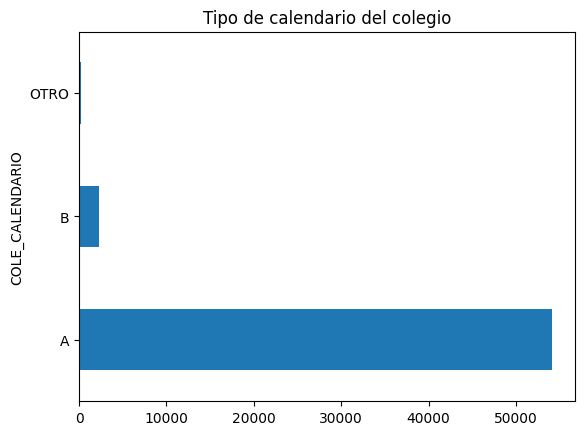

In [ ]:
tipo_cal = data_icfes['COLE_CALENDARIO'].value_counts()
tipo_cal.plot.barh(
    y = 'count',
    title = 'Tipo de calendario del colegio',
)

In [ ]:
calendario_col = {'OTRO': 0, 'A': 1, 'B': 2}
data_icfes['COLE_CALENDARIO'] = data_icfes['COLE_CALENDARIO'].map(calendario_col)

<Axes: title={'center': 'Horas diarias dedicadas al Internet'}, ylabel='ESTU_DEDICACIONINTERNET'>

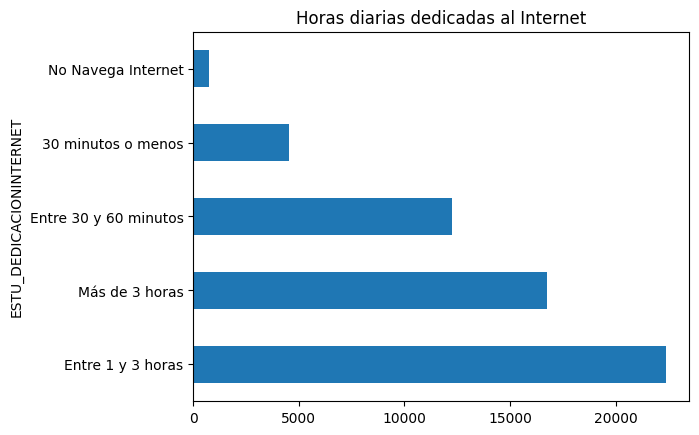

In [ ]:
horas_int = data_icfes['ESTU_DEDICACIONINTERNET'].value_counts()
horas_int.plot.barh(
    y = 'count',
    title = 'Horas diarias dedicadas al Internet',
)

In [ ]:
internet = {'No Navega Internet': 0, '30 minutos o menos': 1, 'Entre 30 y 60 minutos': 2, 'Entre 1 y 3 horas': 3, 'Más de 3 horas': 4}
data_icfes['ESTU_DEDICACIONINTERNET'] = data_icfes['ESTU_DEDICACIONINTERNET'].map(internet)

<Axes: title={'center': 'Número de libros que hay en el hogar'}, ylabel='FAMI_NUMLIBROS'>

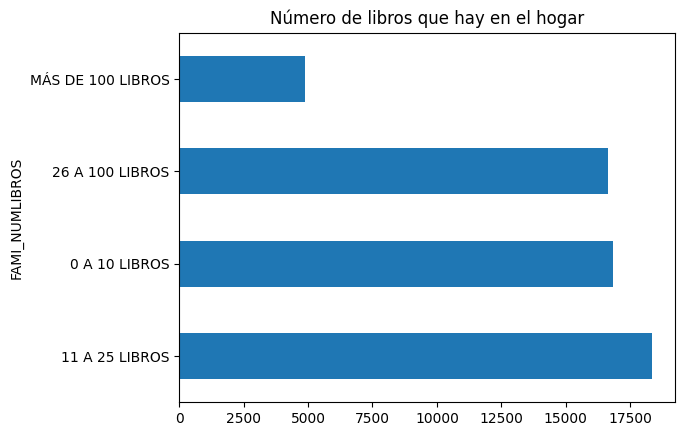

In [ ]:
libros = data_icfes['FAMI_NUMLIBROS'].value_counts()
libros.plot.barh(
    y = 'count',
    title = 'Número de libros que hay en el hogar',
)

In [ ]:
num_libros = {'0 A 10 LIBROS': 0, '11 A 25 LIBROS': 1, '26 A 100 LIBROS': 2, 'MÁS DE 100 LIBROS': 3}
data_icfes['FAMI_NUMLIBROS'] = data_icfes['FAMI_NUMLIBROS'].map(num_libros)

In [ ]:
#En este fragmento, se determina la edad de cada estudiante
data_icfes['Fecha 2023'] = "2023-12-31" #Se crea esta columna con fecha 31 de diciembre de 2023
data_icfes['Fecha 2023'] = pd.to_datetime(data_icfes['Fecha 2023']) #Se transforma esta columna a un formato fecha
data_icfes['EDAD'] = (data_icfes['Fecha 2023'] - data_icfes['ESTU_FECHANACIMIENTO']) #Se crea otra columna llamada EDAD, que implica restar las columnas Fecha 2023 y Fecha de nacimiento para calcular la edad
data_icfes['EDAD'] = data_icfes['EDAD'].astype('timedelta64[s]') #El resultado tiene unidades de milisegundos, por lo que es necesario convertirlo a segundos
data_icfes['EDAD'] = data_icfes['EDAD'].astype('int64') #La columna EDAD se transforma a un formato numérico entero 64 bits
data_icfes['EDAD'] = data_icfes['EDAD']/31536000 #Se realiza la conversión de segundos a años
data_icfes['EDAD'] = data_icfes['EDAD'].astype('int') #Se transforma la columna EDAD a un formato numérico entero 32 bits
#Una vez lista la columna EDAD, se eliminan las columnas Fecha 2023 y Fecha de nacimiento
data_icfes = data_icfes.drop('Fecha 2023', axis=1)
data_icfes = data_icfes.drop('ESTU_FECHANACIMIENTO', axis=1)

In [ ]:
#Esta columna tiene formato de caracter. Hay que transformarla a formato numérico entero
data_icfes['ESTU_NSE_INDIVIDUAL'] = data_icfes['ESTU_NSE_INDIVIDUAL'].astype('int')

<Axes: title={'center': 'Puntaje global'}, ylabel='PUNT_GLOBAL'>

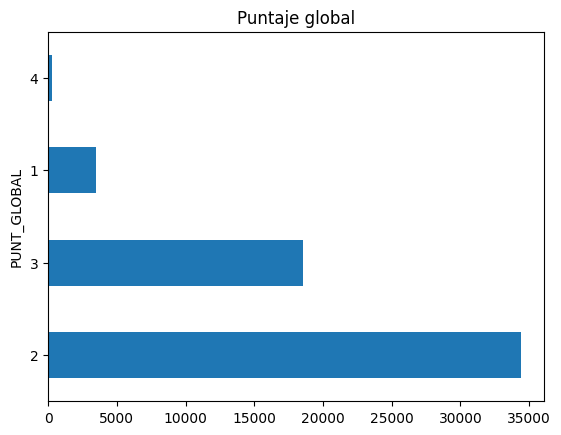

In [ ]:
#Se clasifican los puntajes en intervalos:
#0: Nivel bajo. Puntajes entre 0 y 100
#1: Nivel medio bajo. Puntajes entre 100 y 200
#2: Nivel medio. Puntajes entre 200 y 300
#3: Nivel medio alto. Puntajes entre 300 y 400
#4: Nivel alto. Puntajes entre 400 y 500
data_icfes['PUNT_GLOBAL'] = pd.cut(data_icfes['PUNT_GLOBAL'], bins=[0, 100, 200, 300, 400, 500], labels=[0,1,2,3,4])
data_icfes['PUNT_GLOBAL'] = data_icfes['PUNT_GLOBAL'].astype('int')
#Se grafican los puntajes para ver cómo es la distribución según la clasificación implementada recientemente
puntajes = data_icfes['PUNT_GLOBAL'].value_counts()
puntajes.plot.barh(
    y = 'count',
    title = 'Puntaje global',
)

In [ ]:
data_icfes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56666 entries, 4 to 80837
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   ESTU_PRESENTACIONSABADO        56666 non-null  int64
 1   FAMI_EDUCACIONMADRE            56666 non-null  int64
 2   FAMI_TIENESERVICIOTV           56666 non-null  int64
 3   COLE_CARACTER                  56666 non-null  int64
 4   ESTU_GENERO                    56666 non-null  int64
 5   FAMI_TIENEHORNOMICROOGAS       56666 non-null  int64
 6   FAMI_PERSONASHOGAR             56666 non-null  int64
 7   ESTU_TIPOREMUNERACION          56666 non-null  int64
 8   FAMI_TIENECONSOLAVIDEOJUEGOS   56666 non-null  int64
 9   ESTU_HORASSEMANATRABAJA        56666 non-null  int64
 10  FAMI_EDUCACIONPADRE            56666 non-null  int64
 11  FAMI_TIENEAUTOMOVIL            56666 non-null  int64
 12  COLE_JORNADA                   56666 non-null  int64
 13  COLE_NATURALEZA      

**Implementación del Árbol de decisión**

1) Datos sin escalar. Es de aclarar que el árbol de decisión no requiere que los datos estén escalados, ya que no se ven afectados por si los datos están en diferentes escalas.

In [ ]:
#Importar el algoritmo del árbol de decisión (clasificador) y otros métodos de la biblioteca Scikit Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
#Función para dividir el conjunto de datos en 3 subconjuntos: Train (entrenamiento), Validation (validación) y Prueba (Test)
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [ ]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

In [ ]:
train_set, val_set, test_set = train_val_test_split(data_icfes)

In [ ]:
X_train, y_train = remove_labels(train_set, 'PUNT_GLOBAL')
X_val, y_val = remove_labels(val_set, 'PUNT_GLOBAL')
X_test, y_test = remove_labels(test_set, 'PUNT_GLOBAL')

In [ ]:
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_train_pred = clf_tree.predict(X_train)

In [ ]:
print("F1 score árbol de decisión train_set sin escalar:", f1_score(y_train_pred, y_train, average='weighted'))

F1 score árbol de decisión train_set sin escalar: 1.0


In [ ]:
y_val_pred = clf_tree.predict(X_val)

In [ ]:
print("F1 score árbol de decisión val_set sin escalar:", f1_score(y_val_pred, y_val, average='weighted'))

F1 score árbol de decisión val_set sin escalar: 0.5823841356421923


In [ ]:
y_test_pred = clf_tree.predict(X_test)

In [ ]:
print("F1 score árbol de decisión test_set sin escalar:", f1_score(y_test_pred, y_test, average='weighted'))

F1 score árbol de decisión test_set sin escalar: 0.5736343624229943


2) Selección de características

In [ ]:
clf_tree.feature_importances_

array([0.00830822, 0.05510544, 0.01098114, 0.01493315, 0.01621921,
       0.01420906, 0.03276293, 0.01508898, 0.01621272, 0.02434401,
       0.05598845, 0.01413682, 0.12070079, 0.00646986, 0.06531137,
       0.01955516, 0.03777241, 0.00894936, 0.03975173, 0.01657651,
       0.03121707, 0.00471615, 0.0442808 , 0.0032142 , 0.02566559,
       0.03750851, 0.0697949 , 0.00939278, 0.02781811, 0.00714421,
       0.00162915, 0.03446833, 0.03788884, 0.03615569, 0.00158109,
       0.03414724])

In [ ]:
feature_importances = {name: score for name, score in zip(list(data_icfes), clf_tree.feature_importances_)}

In [ ]:
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(10)

,0
COLE_JORNADA,0.120701
FAMI_TRABAJOLABORPADRE,0.069795
FAMI_TRABAJOLABORMADRE,0.065311
FAMI_EDUCACIONPADRE,0.055988
FAMI_EDUCACIONMADRE,0.055105
ESTU_DEDICACIONLECTURADIARIA,0.044281
FAMI_CUARTOSHOGAR,0.039752
ESTU_DEDICACIONINTERNET,0.037889
FAMI_COMECEREALFRUTOSLEGUMBRE,0.037772
FAMI_ESTRATOVIVIENDA,0.037509


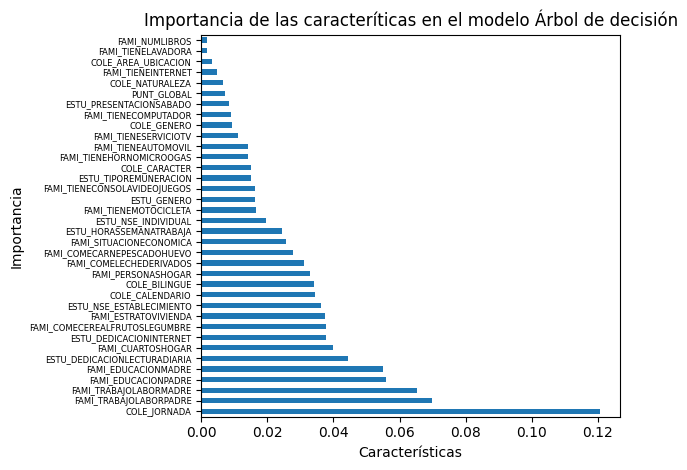

In [ ]:
fig, ax = plt.subplots()
feature_importances_sorted.plot.barh()
ax.set_title("Importancia de las caracteríticas en el modelo Árbol de decisión")
ax.set_xlabel("Características")
ax.set_yticklabels(feature_importances_sorted.index.values, fontdict={'size': 6})
ax.set_ylabel("Importancia")
fig.tight_layout()

In [ ]:
#Seleccionar la mitad de las características para ver cómo se comporta el modelo
columnas = list(feature_importances_sorted.head(18).index)
columnas

['COLE_JORNADA',
 'FAMI_TRABAJOLABORPADRE',
 'FAMI_TRABAJOLABORMADRE',
 'FAMI_EDUCACIONPADRE',
 'FAMI_EDUCACIONMADRE',
 'ESTU_DEDICACIONLECTURADIARIA',
 'FAMI_CUARTOSHOGAR',
 'ESTU_DEDICACIONINTERNET',
 'FAMI_COMECEREALFRUTOSLEGUMBRE',
 'FAMI_ESTRATOVIVIENDA',
 'ESTU_NSE_ESTABLECIMIENTO',
 'COLE_CALENDARIO',
 'COLE_BILINGUE',
 'FAMI_PERSONASHOGAR',
 'FAMI_COMELECHEDERIVADOS',
 'FAMI_COMECARNEPESCADOHUEVO',
 'FAMI_SITUACIONECONOMICA',
 'ESTU_HORASSEMANATRABAJA']

In [ ]:
X_train_reduced = X_train[columnas].copy()
X_val_reduced = X_val[columnas].copy()
X_test_reduced = X_test[columnas].copy()

In [ ]:
clf_tree.fit(X_train_reduced, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_train_pred_1 = clf_tree.predict(X_train_reduced)

In [ ]:
print("F1 score árbol de decisión train_set_reduced sin escalar:", f1_score(y_train_pred_1, y_train, average='weighted'))

F1 score árbol de decisión train_set_reduced sin escalar: 0.999029542889956


In [ ]:
y_val_pred_1 = clf_tree.predict(X_val_reduced)

In [ ]:
print("F1 score árbol de decisión val_set_reduced sin escalar:", f1_score(y_val_pred_1, y_val, average='weighted'))

F1 score árbol de decisión val_set_reduced sin escalar: 0.566195667791377


In [ ]:
y_test_pred_1 = clf_tree.predict(X_test_reduced)

In [ ]:
print("F1 score árbol de decisión test_set_reduced sin escalar:", f1_score(y_test_pred_1, y_test, average='weighted'))

F1 score árbol de decisión test_set_reduced sin escalar: 0.5529512584532096


En ambos casos, el árbol de decisión presenta overfitting: Tienen un F1-score muy alto para el conjunto de entrenamiento (casi 100%), pero en los conjuntos de validación y prueba no superan el 58%. Por lo tanto, en estas condiciones, el modelo "se aprendió los datos de memoria", pero no generaliza bien con otros datos.  

3) Random Search

En este apartado se pretende buscar los mejores valores de los hiperparámetros para reducir el overfitting presentado en los puntos inmediatamente anteriores.

In [ ]:
#Importar método para el Random Search
from sklearn.model_selection import RandomizedSearchCV
#Metodo que permite buscar valores aleatorios
from scipy.stats import randint

#Preparación del Random Search

param_distribs = {
    'max_depth': randint(low=8, high=50),
    'min_samples_split': randint(low=3, high=10),
    'min_samples_leaf': randint(low=1, high=4)
}

rand_clf_tree = DecisionTreeClassifier()

rand_search = RandomizedSearchCV(estimator=rand_clf_tree, param_distributions=param_distribs,
                        n_iter=10, random_state=42, scoring='f1_weighted', cv=5)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e2e1588b1d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e2e158bd110>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e2e157f3810>},
                   random_state=42, scoring='f1_weighted')

In [ ]:
rand_search.best_params_

{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [ ]:
rand_search.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_split=3)

In [ ]:
cvres = rand_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("F1 score:", mean_score, "-", "Parámetros:", params)

F1 score: 0.5910532574108684 - Parámetros: {'max_depth': 46, 'min_samples_leaf': 1, 'min_samples_split': 9}
F1 score: 0.626985298493741 - Parámetros: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 7}
F1 score: 0.5843872350371537 - Parámetros: {'max_depth': 46, 'min_samples_leaf': 2, 'min_samples_split': 5}
F1 score: 0.5857628424775949 - Parámetros: {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 5}
F1 score: 0.5833413335582602 - Parámetros: {'max_depth': 31, 'min_samples_leaf': 1, 'min_samples_split': 6}
F1 score: 0.5908853507846514 - Parámetros: {'max_depth': 47, 'min_samples_leaf': 3, 'min_samples_split': 8}
F1 score: 0.6542720558494286 - Parámetros: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 8}
F1 score: 0.6558678677559755 - Parámetros: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}
F1 score: 0.6032045702037117 - Parámetros: {'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 8}
F1 score: 0.5830906431028834 - 

In [ ]:
rand_search.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
clf_tree = rand_search.best_estimator_

In [ ]:
y_train_pred = clf_tree.predict(X_train)

In [ ]:
print("F1 score Conjunto entrenamiento:", f1_score(y_train_pred, y_train, average='weighted'))

F1 score Conjunto entrenamiento: 0.7437964212004683


In [ ]:
y_val_pred = clf_tree.predict(X_val)

In [ ]:
print("F1 score conjunto validacion:", f1_score(y_val_pred, y_val, average='weighted'))

F1 score conjunto validacion: 0.723239652342735


In [ ]:
y_test_pred = clf_tree.predict(X_test)

In [ ]:
print("F1 score conjunto prueba:", f1_score(y_test_pred, y_test, average='weighted'))

F1 score conjunto prueba: 0.7153288924815945


Los puntajes en cada conjunto de datos están muy cercanos, por lo que se redujo notablemente el overfitting. Si bien el puntaje de F1-score en el conjunto de entrenamiento se redujo al 74%, el valor del conjunto de validación está muy próximo (alrededor de 72%). En estas condiciones, el árbol realiza una mejor generalización.

Cabe aclarar, que al ejecutar este notebook nuevamente, los puntajes de F1-score para el modelo ya optimizado pueden variar ligeramente, ya que tras la ejecución del random search, el valor óptimo de random_state corresponde None. Para evitar este pequeño inconveniente, se volverá a implementar el modelo con los valores de los hiperparámetros seleccionados y agregando como random_state igual a 42.

In [ ]:
clf_tree_final = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1, min_samples_split= 3, random_state=42)
clf_tree_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=3, random_state=42)

In [ ]:
y_train_pred = clf_tree_final.predict(X_train)

In [ ]:
print("F1 score Conjunto entrenamiento:", f1_score(y_train_pred, y_train, average='weighted'))

F1 score Conjunto entrenamiento: 0.7436835640652231


In [ ]:
y_val_pred = clf_tree_final.predict(X_val)

In [ ]:
print("F1 score Conjunto validacion:", f1_score(y_val_pred, y_val, average='weighted'))

F1 score Conjunto validacion: 0.7231812180272937


In [ ]:
y_test_pred = clf_tree_final.predict(X_test)

In [ ]:
print("F1 score Conjunto pruebas:", f1_score(y_test_pred, y_test, average='weighted'))

F1 score Conjunto pruebas: 0.7152675542133007
